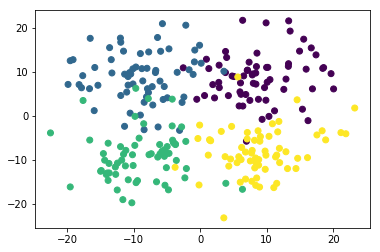

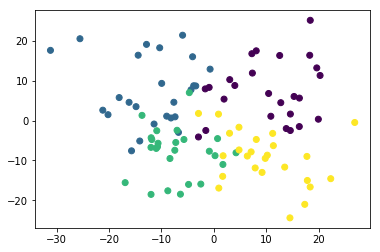

In [33]:
"""
KNN Practice
"""
import matplotlib.pyplot as plt
import numpy as np
import operator


# parameters
numOfdata=65
numOftest=25
mean,std=9,5.5


#train vector를 각 사분면에 뿌림.
train_vector=np.random.normal(0,std,[numOfdata*4,2])
for i in range(numOfdata):
    train_vector[i]+=[mean,mean]
    train_vector[i+numOfdata]+=[-mean,mean]
    train_vector[i+2*numOfdata]-=[mean,mean]
    train_vector[i+3*numOfdata]+=[mean,-mean]

train_label=np.array([1]*numOfdata+[2]*numOfdata+[3]*numOfdata+[4]*numOfdata)

plt.scatter(train_vector[:,0],train_vector[:,1],c=train_label)
plt.show()


#test vector도 뿌림. 대신, 분산도가 좀 더 크게.
test_vector=np.random.normal(0,std*1.4,[numOftest*4,2])
for i in range(numOftest):
    test_vector[i]+=[mean,mean]
    test_vector[i+numOftest]+=[-mean,mean]
    test_vector[i+2*numOftest]-=[mean,mean]
    test_vector[i+3*numOftest]+=[mean,-mean]
test_label=np.array([1]*numOftest+[2]*numOftest+[3]*numOftest+[4]*numOftest)


#scatter로 뿌려진 point들 확인
plt.scatter(test_vector[:,0],test_vector[:,1],c=test_label)
plt.show()

In [34]:
"""
K=1일때 KNN구현
knn1(training vector,number=1or2) 로 생성.
number에 따라 l1 dist, l2 dist를 구함. l1은 맨해튼, l2는 유클리드

반드시 predict와 accuracy 함수를 연달아 쓰기를.
predict(test vector)를 통해 pred label를 list로 return함.
accuracy(test label)을 통해 방금 predict한 것과 ground truth와의 정확도를 비교.
"""

class knn1:
    def __init__(self,vector,label,number=1):
        self.tr_vector=vector
        self.tr_label=label
        self.number=number
    def predict(self,test):
        test_n=test.shape[0]
        pred_label=np.zeros(test_n,dtype=self.tr_label.dtype)
        
        """l1distances and l2distances are array with size: test_n * 1 of which each element means distance"""
        if self.number==1:
            for i in range(test_n):
                l1distances = np.sum(np.abs(test[i]-self.tr_vector), axis=1)
                l1min_index = np.argmin(l1distances)
                pred_label[i]=self.tr_label[l1min_index]
            
        elif self.number==2:
             for i in range(test_n):
                l2distances = np.sqrt(np.sum((test[i]-self.tr_vector)**2, axis=1))
                l2min_index = np.argmin(l2distances)
                pred_label[i]=self.tr_label[l2min_index]

        self.p_label=pred_label
            
        return pred_label
    
    def accuracy(self,test):
        acc=0
        for i in range(len(self.p_label)):
            if(test[i]==self.p_label[i]):
                acc+=1
        acc/=len(self.p_label)
        return acc

In [35]:
#확인해보기
a=knn1(train_vector,train_label,1)
b=knn1(train_vector,train_label,2)
print(a.predict(test_vector),a.accuracy(test_label))
print(b.predict(test_vector),b.accuracy(test_label))

[1 1 2 4 1 1 1 1 1 1 1 1 1 1 2 1 1 3 1 1 4 1 2 2 1 3 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 2 2 2 2 2 3 3 3 3 3 2 4 4 4 4 4 2 3 3 3 3 3 2 3 3 2 3 3 2
 3 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 4] 0.76
[1 1 2 4 1 1 1 1 1 1 1 1 1 1 2 1 1 3 1 1 4 1 2 2 1 3 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 2 3 2 2 2 2 2 3 3 3 3 3 2 3 4 4 4 4 2 3 3 3 3 3 2 3 3 2 3 3 2
 3 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 4] 0.77


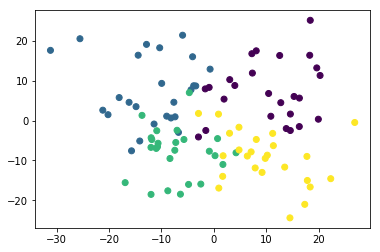

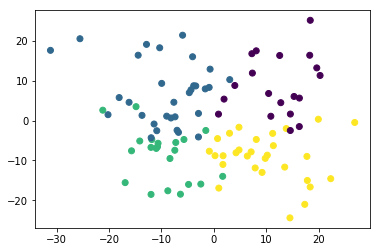

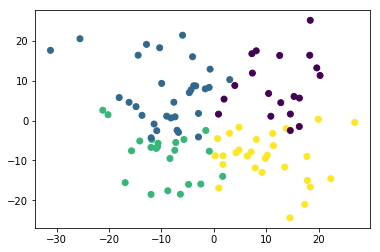

In [36]:
#test vector가 어떻게 뿌려져있고, prediction이 어떻게 되어있는지 색 비교
plt.scatter(test_vector[:,0],test_vector[:,1],c=test_label)
plt.show()

plt.scatter(test_vector[:,0],test_vector[:,1],c=a.p_label)
plt.show()

plt.scatter(test_vector[:,0],test_vector[:,1],c=b.p_label)
plt.show()

In [37]:
"""
일반적인 K일때 KNN구현
knn1의 함수는 predict(test_vector,number) (예측label을 return함)
"""

#class 상속, method overriding.
class knn(knn1):
    def predict(self,test,k=1):
        test_n=test.shape[0]
        pred_label=np.zeros(test_n,dtype=self.tr_label.dtype)
        
        """
        l1distances and l2distances are array with size: test_n * 1 of which each element means distance
        dist가 가장 작은 것부터 k개의 training vector에 대해 label의 투표율이 가장 높은 것을 test vector의 label로 한다.
        """
        if self.number==1:
            for i in range(test_n):
                # L1 Distance를 각 training data에 대해 구한다.
                l1distances = np.sum(np.abs(test[i]-self.tr_vector), axis=1)
                # 이 값이 작은 순서대로 index를 정렬한다.
                sort_idx=l1distances.argsort()
                # k개만큼 label을 담을 list와, label의 투표수를 체크할 dictionary를 만들어준다
                knn_labels=[]
                knn_dict={}
                # list에 label을 넣는다
                for j in range(k):
                    knn_labels.append(self.tr_label[sort_idx[j]])
                    
                #label의 투표수를 체크한다.
                for label in  knn_labels:
                    #try와 except를 여기서 쓰는 게 인상적이다.
                    try:
                        knn_dict[label]+=1
                    except:
                        knn_dict[label]=1
                
                #dict안의 key들을 value 크기로 sort하고, 가장 투표율이 높은 걸로 결정한다.
                knn_dict=sorted(knn_dict.items(),key=operator.itemgetter(1))
                knn_dict.reverse()
                pred_label[i]=knn_dict[0][0]
            
        elif self.number==2:
             for i in range(test_n):
                # L2 Distance를 각 training data에 대해 구한다.
                l2distances = np.sqrt(np.sum((test[i]-self.tr_vector)**2, axis=1))
                # 이 값이 작은 순서대로 index를 정렬한다.
                sort_idx=l2distances.argsort()
                # k개만큼 label을 담을 list와, label의 투표수를 체크할 dictionary를 만들어준다
                knn_labels=[]
                knn_dict={}
                # list에 label을 넣는다
                for j in range(k):
                    knn_labels.append(self.tr_label[sort_idx[j]])
                    
                #label의 투표수를 체크한다.
                for label in  knn_labels:
                    #try와 except를 여기서 쓰는 게 인상적이다.
                    try:
                        knn_dict[label]+=1
                    except:
                        knn_dict[label]=1
                
                #dict안의 key들을 value 크기로 sort하고, 가장 투표율이 높은 걸로 결정한다.
                knn_dict=sorted(knn_dict.items(),key=operator.itemgetter(1))
                knn_dict.reverse()
                pred_label[i]=knn_dict[0][0]

        self.p_label=pred_label
            
        return pred_label
        

In [45]:
#확인해보기
a=knn(train_vector,train_label,1)
b=knn(train_vector,train_label,2)
print(a.predict(test_vector,11),a.accuracy(test_label))
print(b.predict(test_vector,11),b.accuracy(test_label))

[1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 3 1 1 4 1 2 3 4 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 3 2 2 2 2 2 3 3 3 3 3 2 3 4 4 4 4 3 3 3 3 3 3 3 3 3 2 3 3 2
 3 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 1 4 4] 0.8
[1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 4 1 2 3 4 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 3 2 2 2 2 2 3 3 3 3 3 2 3 4 4 4 4 3 3 3 3 3 3 3 3 3 2 3 3 3
 3 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 1 4 4] 0.81


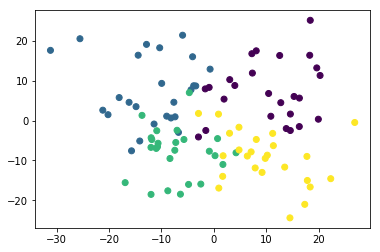

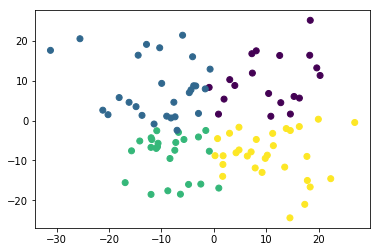

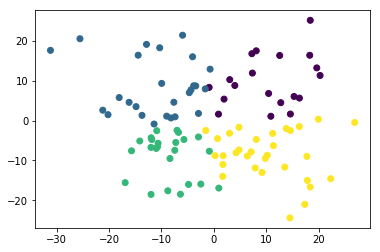

In [46]:
#test vector가 어떻게 뿌려져있고, prediction이 어떻게 되어있는지 색 비교
plt.scatter(test_vector[:,0],test_vector[:,1],c=test_label)
plt.show()

plt.scatter(test_vector[:,0],test_vector[:,1],c=a.p_label)
plt.show()

plt.scatter(test_vector[:,0],test_vector[:,1],c=b.p_label)
plt.show()